# Parsing XML and HTML files

In [14]:
xml_file = open('sample_xml.xml', 'r')
xml_content = ''
for line in xml_file.readlines():
    print(line.rstrip())
    xml_content += line.rstrip()

<?xml version = "1.0" encoding = "utf-8"?>
<!-- planes.xml - A document that lists ads for
                  used airplanes -->
<!DOCTYPE planes_for_sale SYSTEM "planes.dtd">
<planes_for_sale>
   <ad>
      <year> 1977 </year>
      <make> &c; </make>
      <model> Skyhawk </model>
      <color> Light blue and white </color>
      <description> New paint, nearly new interior,
            685 hours SMOH, full IFR King avionics </description>
      <price> 23,495 </price>
      <seller phone = "555-222-3333"> Skyway Aircraft </seller>
      <location>
         <city> Rapid City, </city>
         <state> South Dakota </state>
      </location>
   </ad>
   <ad>
      <year> 1965 </year>
      <make> &p; </make>
      <model> Cherokee </model>
      <color> Gold </color>
      <description> 240 hours SMOH, dual NAVCOMs, DME,
                new Cleveland brakes, great shape </description>
      <seller phone = "555-333-2222"
              email = "jseller@www.axl.com">
              John Se

## Beautifulsoup for parsing xml

In [31]:
from bs4 import BeautifulSoup

xml_parsed = BeautifulSoup(xml_content, 'lxml')
ads = xml_parsed.planes_for_sale.find_all('ad')
for ad in ads:
    print("Location : ", ad.location.state.get_text().strip(), ", Seller : ", ad.seller.get_text().strip())


Location :  South Dakota , Seller :  Skyway Aircraft
Location :  Missouri , Seller :  John Seller


In [25]:
models = xml_parsed.find_all('model')
for model in models:
    print("Model : ", model.get_text())

Model :   Skyhawk 
Model :   Cherokee 


## HTML Parsing from URL

In [48]:
import urllib3
from bs4 import BeautifulSoup
urllib3.disable_warnings()

http = urllib3.PoolManager()
url ='https://www.ucf.edu/'
page = http.urlopen('GET',url).data.decode('utf-8')
print(page)


<!DOCTYPE html>
<html lang="en-us">
	<head>
		<title>University of Central Florida | Orlando&#039;s Hometown University</title>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=Edge">
<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
<link rel="icon" href="https://www.ucf.edu/files/2018/02/cropped-favicon-32x32.png" sizes="32x32" />
<link rel="icon" href="https://www.ucf.edu/files/2018/02/cropped-favicon-192x192.png" sizes="192x192" />
<meta name="msapplication-TileImage" content="https://www.ucf.edu/files/2018/02/cropped-favicon-270x270.png" />
					<link rel="apple-touch-icon" sizes="120x120" href="https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-120x120.jpg">
				
					<link rel="apple-touch-icon" sizes="152x152" href="https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-152x152.jpg">
				
					<link rel="apple-touch-icon" sizes="167x167" href="https://www.ucf.edu/files/2018/02/1711OTP3

In [68]:
soup = BeautifulSoup(page, 'html.parser')
soup.prettify()
links = []
for anchor in soup.findAll('a', href=True):
    href = anchor['href']
    if 'www.' in href:
        links.append(href)

for link in links[0:10]:
    print(link)

https://www.ucf.edu/academics/
https://www.ucf.edu/admissions/
https://www.ucf.edu/research/
https://www.ucf.edu/locations/
https://www.ucf.edu/students/
https://www.ucf.edu/alumni-giving/
https://www.ucf.edu/athletics/
https://www.ucf.edu/apply-to-ucf/
https://www.ucf.edu/leadership/president/
https://www.ucf.edu/degree-search


In [51]:
images = []
for link in soup.findAll('link', href=True):
    href = link['href']
    if '.jpg' in href or '.png' in href:
        print(link['href'])
        images.append(href)

https://www.ucf.edu/files/2018/02/cropped-favicon-32x32.png
https://www.ucf.edu/files/2018/02/cropped-favicon-192x192.png
https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-120x120.jpg
https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-152x152.jpg
https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-167x167.jpg
https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-180x180.jpg
https://www.ucf.edu/files/2018/02/cropped-favicon-32x32.png
https://www.ucf.edu/files/2018/02/cropped-favicon-192x192.png
https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-120x120.jpg
https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-152x152.jpg
https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-167x167.jpg
https://www.ucf.edu/files/2018/02/1711OTP330-Search-Campaign_ICON-MAIN-180x180.jpg


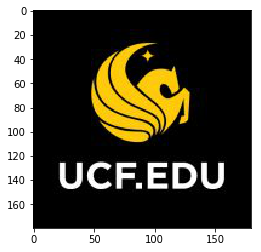

In [55]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

import requests
from io import BytesIO

response = requests.get(images[-1])
img = Image.open(BytesIO(response.content))
imshow(np.asarray(img))
plt.show()

# Reading HDFS files

**HDFS** stands for **H**a**D**oop **F**ile **S**ystem. An HDF5 file is a binary file containing scientific data and supporting metadata. It’s a powerful binary data format with no upper limit on the file size. It provides parallel IO, and carries out a bunch of low level optimisations under the hood to make queries faster and storage requirements smaller.

In [59]:
import h5py as h5

f = h5.File('sample_hdfs.h5', 'r')
print([key for key in f.keys()])


['usps']


In [62]:
data = f['usps']
print([key for key in data.keys()])

['test_X', 'test_y', 'train_X', 'train_y']


In [65]:
train_X = data['train_X']
train_y = data['train_y']

test_X = data['test_X']
test_y = data['test_y']

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(7291, 1, 16, 16) (7291,)
(2007, 1, 16, 16) (2007,)



## Reading Microsoft Excel files

In [79]:
from xlrd import open_workbook

wb = open_workbook('sample_excel.xlsx')
print(wb.sheet_names())

['SalesOrders']


In [83]:
from xlrd import open_workbook

wb = open_workbook('sample_excel.xlsx')
for sheet in wb.sheets():
    number_of_rows = sheet.nrows
    number_of_columns = sheet.ncols
    print("Number of rows : ", number_of_rows)
    print("Number of columns : ", number_of_columns)
    
    items = []
    rows = []
    
    print("Printing first ten rows:")
    for row in range(1, 10):
        values = []
        for col in range(number_of_columns):
            value  = (sheet.cell(row,col).value)
            try:
                value = str(int(value))
            except ValueError:
                pass
            finally:
                values.append(value)
        print(values)

Number of rows :  44
Number of columns :  7
Printing first ten rows:
['42375', 'East', 'Jones', 'Pencil', '95', '1', '189']
['42392', 'Central', 'Kivell', 'Binder', '50', '19', '999']
['42409', 'Central', 'Jardine', 'Pencil', '36', '4', '179']
['42426', 'Central', 'Gill', 'Pen', '27', '19', '539']
['42444', 'West', 'Sorvino', 'Pencil', '56', '2', '167']
['42461', 'East', 'Jones', 'Binder', '60', '4', '299']
['42478', 'Central', 'Andrews', 'Pencil', '75', '1', '149']
['42495', 'Central', 'Jardine', 'Pencil', '90', '4', '449']
['42512', 'West', 'Thompson', 'Pencil', '32', '1', '63']
